In [68]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model

In [226]:
folder = r'C:\Users\Marina\Documents\Doctorado2\2019-11-14'

files = glob.glob(folder + '\Image59*.csv') #change number for each analysis

#change time in seconds for each analysis
#tot_time = 147 #image 9
#tot_time = 162 #image 12
#tot_time = 164 #image 17
#tot_time = 105 #image 21
#tot_time = 123 #image 25
#tot_time = 124 #image 36
#tot_time = 104 #image 40
#tot_time = 108 #image 47
#tot_time = 129 #image 51
#tot_time = 115 #image 55
tot_time = 115 #image 59
#tot_time = 138 #image 63 2 DONORS
#tot_time = 165 #image 67 NON RECOVERY

In [217]:
bgr = pd.read_csv(files[0])['Y'].values
bleach = pd.read_csv(files[1])['Y'].values

if len(files) == 3:
    ctr = pd.read_csv(r'C:\Users\Marina\Documents\Doctorado2\2019-11-14\Image9_ctrl.csv')['Y'].values
    donor = pd.read_csv(files[2])['Y'].values
else:
    ctr = pd.read_csv(files[2])['Y'].values
    donor = pd.read_csv(files[3])['Y'].values
    
time_step = tot_time/len(bgr)
t = np.arange(0, tot_time, time_step)

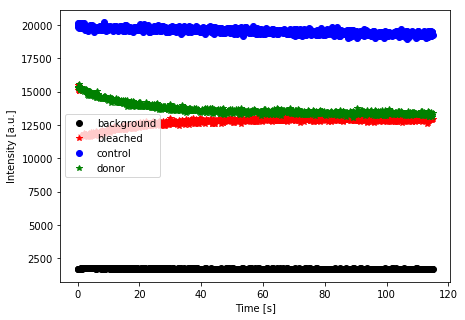

In [218]:
plt.rcParams["figure.figsize"] = [7, 5]
plt.plot(t, bgr, 'ko', label = 'background')
plt.plot(t, bleach, 'r*', label = 'bleached')
plt.plot(t, ctr, 'bo', label = 'control')
plt.plot(t, donor, 'g*', label = 'donor')
plt.xlabel('Time [s]')
plt.ylabel('Intensity [a.u.]')
plt.legend()
plt.show()

In [227]:
#we take only after bleaching data
bgr = bgr[10:]
ctr = ctr[10:]
bleach = bleach[10:]
donor = donor[10:]
t = t[10:]

#normalize control

norm_ctr = (ctr-bgr)/(ctr[0]-bgr[0])

#substract bgr and natural bleach to signals

bleach_n = (bleach-bgr)*(2-norm_ctr)
donor_n = (donor-bgr)*(2-norm_ctr)

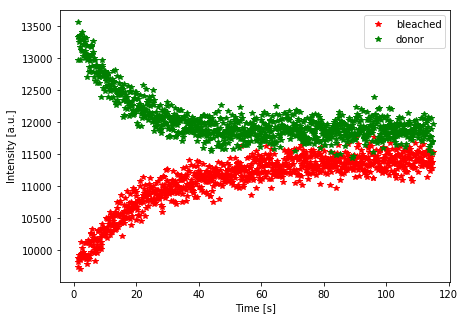

In [220]:
plt.rcParams["figure.figsize"] = [7, 5]
plt.plot(t, bleach_n, 'r*', label = 'bleached')
plt.plot(t, donor_n, 'g*', label = 'donor')
plt.xlabel('Time [s]')
plt.ylabel('Intensity [a.u.]')
plt.legend()
plt.show()

[[Model]]
    Model(recovery)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 38
    # data points      = 990
    # variables        = 3
    chi-square         = 18030216.9
    reduced chi-square = 18267.6970
    Akaike info crit   = 9717.75614
    Bayesian info crit = 9732.44925
[[Variables]]
    amp:  11417.8019 +/- 8.54467732 (0.07%) (init = 15000)
    x0:  -44.3036386 +/- 1.32812324 (3.00%) (init = 0)
    tau:  0.04323832 +/- 0.00112236 (2.60%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(x0, tau)  =  0.983
    C(amp, tau) = -0.761
    C(amp, x0)  = -0.675



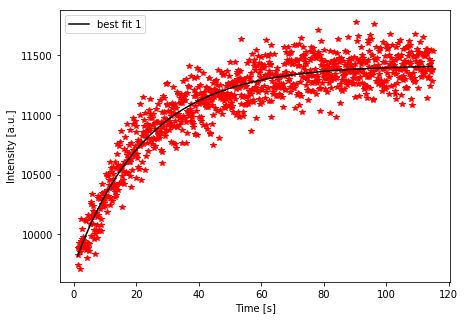

In [221]:
def recovery(x, amp, x0, tau):
    return amp*(1-np.exp(-(x-x0)*tau))

mod = Model(recovery)
pars = mod.make_params(amp=15000, tau = 0, x0 = 0)

result = mod.fit(bleach_n, pars, x=t)

print(result.fit_report())

#mod2 = Model(diffusion)
#pars2 = mod2.make_params(amp = 1000, D = 0, w = 0, y0 = 13000)

#result2 = mod2.fit(bleach_n, x=t)

#print(result2.fit_report())


plt.plot(t, bleach_n, 'r*')
plt.plot(t, result.best_fit, 'k-', label='best fit 1')
plt.ylabel('Intensity [a.u.]')
plt.xlabel('Time [s]')
plt.legend()
plt.show()

In [222]:
tau, e_tau = 0.04323832, 0.00112236 ##change 
tau_m = np.log(0.5)/-tau
etau_m = np.log(0.5)*e_tau/-tau**2
D = 0.224*12**2/tau_m
e_D = 0.224*12**2*etau_m/tau_m**2
D, e_D

(2.0121199206109774, 0.05222966373570796)

In [ ]:
##only for 2 donors
bgr = pd.read_csv(files[0])['Y'].values
bleach = pd.read_csv(files[1])['Y'].values
donor1 = pd.read_csv(files[2])['Y'].values
donor2 = pd.read_csv(files[3])['Y'].values
time_step = tot_time/len(bgr)
t = np.arange(0, tot_time, time_step)

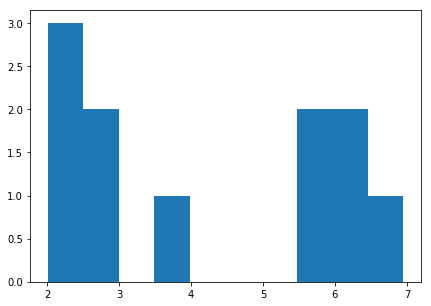

In [225]:
D_list = [2.4008687756266207, 2.823327533092021, 5.745133176684121, 6.168204807622737, 2.5438562985938713, 5.595263508086347, 6.946623921964553, 3.6942849576209813, 2.02628674456324, 6.0861388623872, 2.0121199206109774]
eD_list = [0.05629408052771476, 0.11964900327950999, 0.25937345199148765, 0.20259540152288819, 0.0878465938948359, 0.4261234337004649, 0.5261800307769672, 0.20203744002373364, 0.07671435454306277, 0.27412429736279875, 0.05222966373570796]

plt.hist(D_list)
plt.show()